In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import dataset
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split  #Scikit-Learn 의 model_selection library를 train_test_split로 명명

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1, stratify=y)   # x와 y의 data를 각각 30%, 70%의 비율로 test_set과 training_set으로 나눔

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [3]:
# 모델 구축 (k=5, weights = 'uniform')
clf_u = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', p=2)
clf_u.fit(X_train,y_train)

y_train_pred=clf_u.predict(X_train)
y_test_pred=clf_u.predict(X_test)

print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인


conf_u = confusion_matrix(y_test,y_test_pred)

# get results
print("confusion matrix : ")
print(conf_u)
print("ACC : ",accuracy_score(y_test,y_test_pred))

Misclassified training samples: 12
Misclassified test samples: 9
confusion matrix : 
[[10  0  0]
 [ 0  6  4]
 [ 1  4  5]]
ACC :  0.7


In [4]:
# 모델 구축 (k=5, weights = 'distance')
clf_d = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', p=2)
clf_d.fit(X_train,y_train)

y_train_pred=clf_d.predict(X_train)
y_test_pred=clf_d.predict(X_test)

print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인


conf_d = confusion_matrix(y_test,y_test_pred)

# get results
print("confusion matrix : ")
print(conf_d)
print("ACC : ",accuracy_score(y_test,y_test_pred))

Misclassified training samples: 8
Misclassified test samples: 9
confusion matrix : 
[[10  0  0]
 [ 0  6  4]
 [ 0  5  5]]
ACC :  0.7


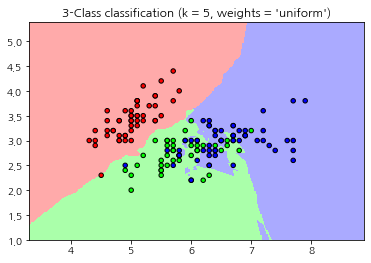

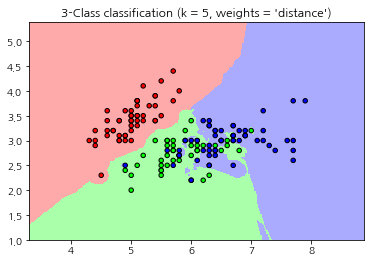

In [5]:
n_neighbors = 5

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [6]:
import seaborn as sns # seaborn을 불러오고 SNS로 축약함.
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download함.
X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의함.
y=iris['species']               # 'species'열을 lavel y를 정의함.

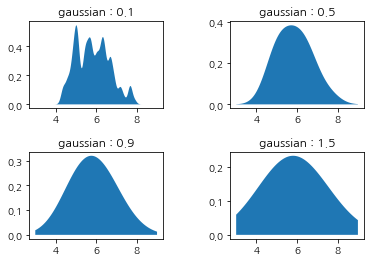

In [11]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

i=0
for band_width in [0.1, 0.5, 0.9, 1.5]:
    kd=KernelDensity(bandwidth = band_width, kernel='gaussian')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
    axs[i].fill_between(xx_d, np.exp(logprob))
    axs[i].set_title('gaussian : ' + str(band_width))
    i+=1

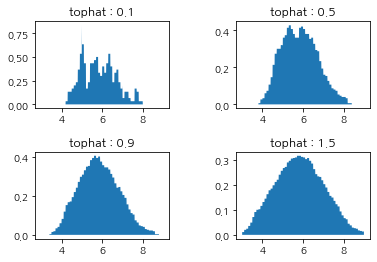

In [13]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

i=0
for band_width in [0.1, 0.5, 0.9, 1.5]:
    kd=KernelDensity(bandwidth = band_width, kernel='tophat')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
    axs[i].fill_between(xx_d, np.exp(logprob))
    axs[i].set_title('tophat : ' + str(band_width))
    i+=1

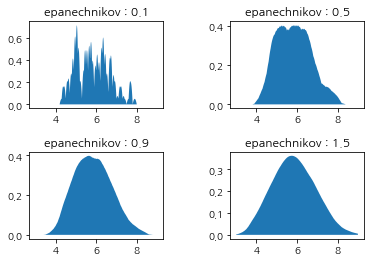

In [14]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

i=0
for band_width in [0.1, 0.5, 0.9, 1.5]:
    kd=KernelDensity(bandwidth = band_width, kernel='epanechnikov')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
    axs[i].fill_between(xx_d, np.exp(logprob))
    axs[i].set_title('epanechnikov : ' + str(band_width))
    i+=1

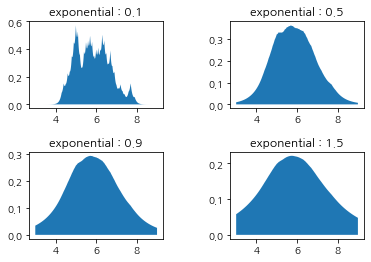

In [15]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

i=0
for band_width in [0.1, 0.5, 0.9, 1.5]:
    kd=KernelDensity(bandwidth = band_width, kernel='exponential')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
    axs[i].fill_between(xx_d, np.exp(logprob))
    axs[i].set_title('exponential : ' + str(band_width))
    i+=1

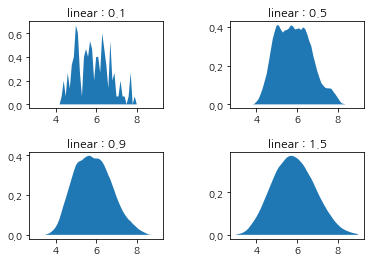

In [16]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

i=0
for band_width in [0.1, 0.5, 0.9, 1.5]:
    kd=KernelDensity(bandwidth = band_width, kernel='linear')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
    axs[i].fill_between(xx_d, np.exp(logprob))
    axs[i].set_title('linear : ' + str(band_width))
    i+=1

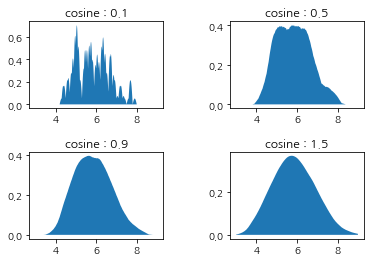

In [17]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
from sklearn.neighbors import KernelDensity

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

i=0
for band_width in [0.1, 0.5, 0.9, 1.5]:
    kd=KernelDensity(bandwidth = band_width, kernel='cosine')
    kd.fit(xx)
    xx_d = np.linspace(3, 9, 1000)
    logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
    axs[i].fill_between(xx_d, np.exp(logprob))
    axs[i].set_title('cosine : ' + str(band_width))
    i+=1